In [8]:
import numpy as np
import pandas as pd
from glob import glob
from os.path import basename

def load_features(folder):
    dataset = None
    
    for class_idx, filename in enumerate(glob('%s/*.csv' % folder)):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        print(filename)
        samples = np.loadtxt(filename, dtype=float, delimiter=',', skiprows=1)
        labels = np.ones((len(samples), 1)) * class_idx
        samples = np.hstack((samples, labels))
        dataset = samples if dataset is None else np.vstack((dataset, samples))

    return dataset, classmap


In [40]:
import numpy as np
import pandas as pd
from glob import glob
from os.path import basename

def load_features(folder):
    dataset = pd.DataFrame(columns = ["label", "Thumb","Index","Middle","Ring","Pinky","ax","ay","az","gx","gy","gz"])
    for class_idx, filename in enumerate(glob('%s/*.csv' % folder)):
        class_name = basename(filename)[:-4]
        classmap[class_idx] = class_name
        current_dataset = pd.read_csv(filename)
        #print(current_dataset)
        dataset = pd.concat([dataset, current_dataset], ignore_index=True, axis=0)
    return dataset, classmap


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def get_model(X_train, Y_train):
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    return clf

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

def generate_heatmap(X_test, y_test, clf):
    # Perform cross-validation to get predictions
    y_test_pred = clf.predict(X_test)

    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    disp.figure_.suptitle(f"Confusion Matrix")
    plt.show()

In [44]:
!python -m pip install micromlgen


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python -m pip install --upgrade pip


     label Thumb Index Middle Ring Pinky        ax        ay        az  \
1613     B    67     2      3    2     1  0.148355  5.854041  7.172486   
1614     B    67     2      3    0     1  0.148355  5.854041  7.172486   
1615     B    65     3      3    0     1  0.148355  5.854041  7.172486   
1616     B    66     2      3    0     2  0.148355  5.854041  7.172486   
1617     B    66     2      3    0     2  0.148355  5.854041  7.172486   
...    ...   ...   ...    ...  ...   ...       ...       ...       ...   
2458     B    69     9     14   10     5 -0.891326  5.796613  3.826123   
2459     B    69    10     14    9     4 -0.891326  5.796613  3.826123   
2460     B    69    11     15   10     5 -0.891326  5.796613  3.826123   
2461     B    69    10     14    6     5 -0.891326  5.796613  3.826123   
2462     B    66    10     15    9     5 -0.891326  5.796613  3.826123   

            gx        gy        gz  
1613  0.324980  0.270002 -2.289523  
1614  0.324980  0.270002 -2.289523  


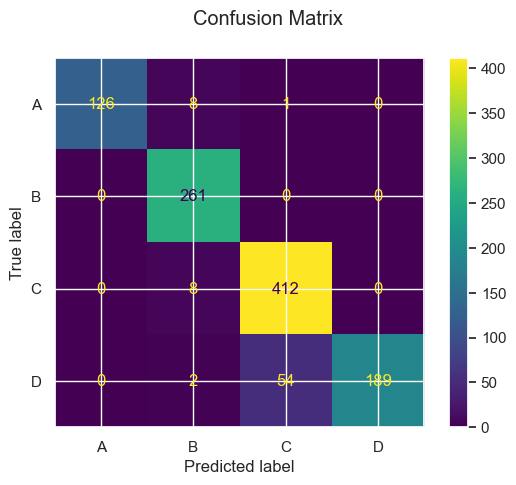

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[4] = { 0 };
                        // tree #1
                        if (x[2] <= 16.5) {
                            if (x[1] <= 1.5) {
                                votes[1] += 1;
                            }

                            else {
                                votes[1] += 1;
                            }
                        }

                        else {
                            if (x[0] <= 0.5) {
                                votes[0] += 1;
                            }

                            else {
                                votes[2] += 1;
                            }
                        }

           

In [52]:
from micromlgen import port

if __name__ == '__main__':
    folder_name = "/Users/haihongyu/Desktop/fyp/static_data"
    dataset, classmap = load_features(folder_name)
    
    print(dataset[dataset["label"]=="B"])
    print(dataset[dataset["label"]=="C"])
    
    X = dataset[["Thumb","Index","Middle","Ring","Pinky","ax","ay","az","gx","gy","gz"]].to_numpy()
    y = dataset["label"].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)
    
    classifier = get_model(X_train, y_train)
    
    generate_heatmap(X_test, y_test, classifier)
    c_code = port(classifier, classmap=classmap)
    print(c_code)
    f = open("RandomForest.h", "w")
    f.write(c_code)
    f.close()

In [56]:
test = np.array([-15.000000,125.000000,109.000000,97.000000,109.000000,1.680958,6.744170,6.893722,-0.090408,-0.017104,0.042761]).reshape([-1,1])
print(test)
print(classifier.predict(test.transpose()))

[[-1.500000e+01]
 [ 1.250000e+02]
 [ 1.090000e+02]
 [ 9.700000e+01]
 [ 1.090000e+02]
 [ 1.680958e+00]
 [ 6.744170e+00]
 [ 6.893722e+00]
 [-9.040800e-02]
 [-1.710400e-02]
 [ 4.276100e-02]]
['A']
